In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Parameters
dt, T, N, gamma, epsilon, T_mem = 0.5, 25, 201, 1, 0.2, 12  # Time step

In [49]:
def stimulus_func(t):
    return 1 if t == 10 else 0

def reward_function(t):
    mu, sigma = 20, 1
    return 0.5 * np.exp(-((t - mu) ** 2) / (2 * sigma ** 2))

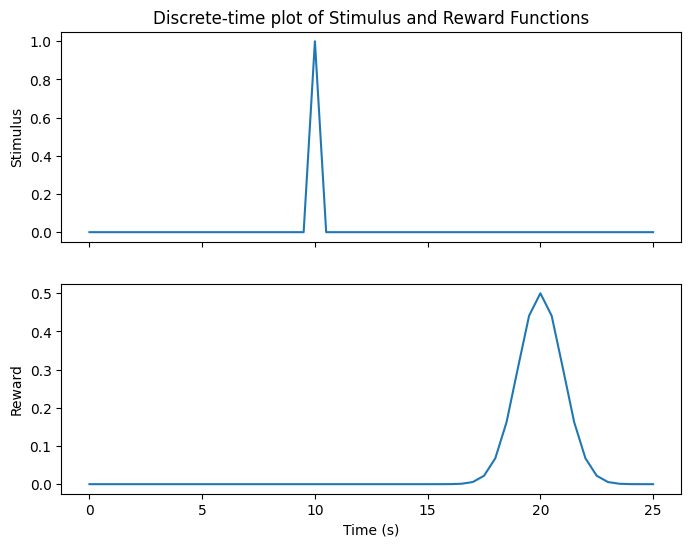

In [58]:
#Plot Stimulus and reward
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex= True)
t_val1 = np.linspace(0, 25, 51) 
t_val2 = np.linspace(0, 25, 51)
stimulus_val = np.array([stimulus_func(t) for t in t_val1])
reward_val = np.array([reward_function(t) for t in t_val2])
ax[0].plot(t_val1, stimulus_val)
ax[1].plot(t_val2, reward_val)

ax[0].set_ylabel("Stimulus")
ax[0].set_title('Discrete-time plot of Stimulus and Reward Functions')
ax[1].set_ylabel("Reward")
ax[1].set_xlabel("Time (s)")

plt.show()


In [51]:
time_steps = int(T/dt)+1 
memory_span = int(T_mem/dt)+1
S = np.zeros((time_steps, memory_span))

for t in range(time_steps):
    for tau in range(memory_span):
        S[t, tau] = stimulus_func(t * 0.5 - tau * 0.5)  # t and tau in steps of 0.5 s

phi = np.zeros((time_steps, memory_span))  # 51 x 25 matrix
for t in range(time_steps):
    for tau in range(memory_span):
        phi[t, tau] = np.sum(S[t, :tau + 1])  # Sum over past tau time steps


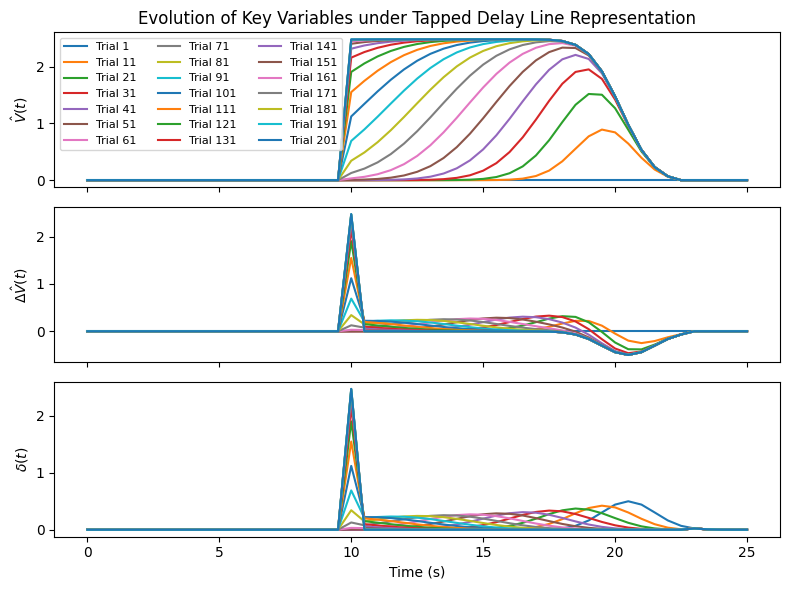

In [52]:

# Initialise value function weights
w = np.zeros(memory_span)

N = 201
# Run TD learning with tapped delay line representation
values = np.zeros((N, time_steps))  # Store value estimates
errors = np.zeros((N, time_steps))  # Store TD errors
delta_v = np.zeros((N, time_steps)) # Store delta V values
for trial in range(0,N):
    for t in range(1,time_steps):
        reward = reward_function((t-1) * dt)
        value_t = np.dot(w, S[t,:])
        value_prev = np.dot(w, S[t-1,:])
        dv = gamma * value_t - value_prev
        td_error = reward + dv
        w += epsilon * td_error * S[t-1,:]  # Weight update
        
        values[trial, t] = value_t
        errors[trial, t] = td_error
        delta_v[trial,t] = dv


# Plot results for selected trials
fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

for trial in range(0, N, 10):
    ax[0].plot(np.arange(time_steps) * dt, values[trial], label=f'Trial {trial+1}')
    ax[1].plot(np.arange(time_steps) * dt, delta_v[trial], label=f'Trial {trial+1}')
    ax[2].plot(np.arange(time_steps) * dt, errors[trial], label=f'Trial {trial+1}')

ax[0].set_ylabel(r'$\hat{V}(t)$')  # Value function
ax[0].legend(ncol=3, fontsize=8)
ax[0].set_title('Evolution of Key Variables under Tapped Delay Line Representation')
ax[1].set_ylabel(r'$\Delta \hat{V}(t)$')  # Temporal difference of value
ax[2].set_ylabel(r'$\delta(t)$')  # Temporal difference learning error
ax[2].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


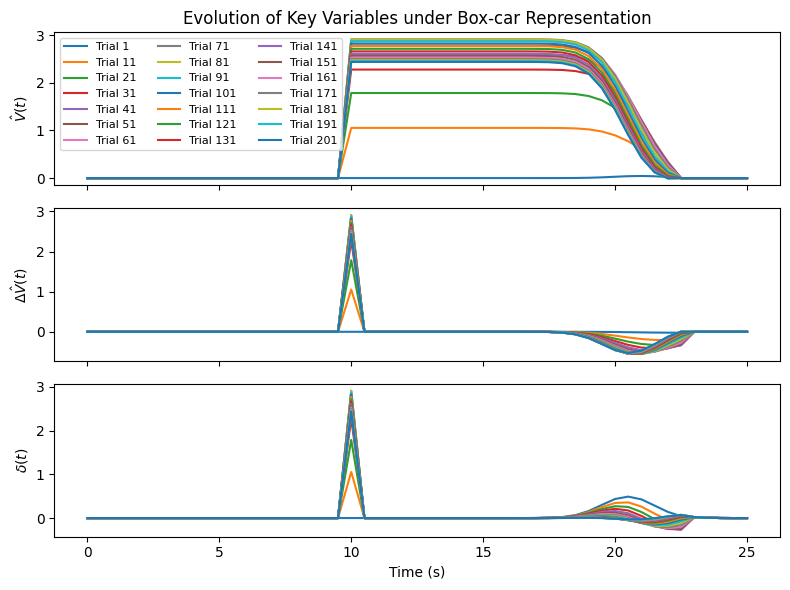

In [53]:
w = np.zeros(memory_span)
epsilon = 0.01

values = np.zeros((N, time_steps))  
errors = np.zeros((N, time_steps))  
delta_v = np.zeros((N, time_steps)) 

# TD Learning with Boxcar Representation
for trial in range(N):
    for t in range(1, time_steps):
        reward = reward_function((t-1) * dt)
        value_t = np.dot(w, phi[t,:])
        value_prev = np.dot(w, phi[t-1,:])
        dv = gamma * value_t - value_prev
        td_error = reward + dv
        w += epsilon * td_error * phi[t-1,:]  # Weight update

        # Store results
        values[trial, t] = value_t
        errors[trial, t] = td_error
        delta_v[trial,t] = dv

# Plot results for selected trials
fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

for trial in range(0, N, 10):  # Every 10th trial
    ax[0].plot(np.arange(time_steps) * dt, values[trial], label=f'Trial {trial+1}')
    ax[1].plot(np.arange(time_steps) * dt, delta_v[trial], label=f'Trial {trial+1}')
    ax[2].plot(np.arange(time_steps) * dt, errors[trial], label=f'Trial {trial+1}')

ax[0].set_ylabel(r'$\hat{V}(t)$')  # Value function
ax[0].legend(ncol=3, fontsize=8)
ax[0].set_title('Evolution of Key Variables under Box-car Representation')
ax[1].set_ylabel(r'$\Delta \hat{V}(t)$')  # Temporal difference of value
ax[2].set_ylabel(r'$\delta(t)$')  # Temporal difference learning error
ax[2].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()

[ True  True False False False  True  True  True False  True  True  True
 False  True  True  True False False  True  True False False  True False
 False False False False  True False False  True  True False False  True
 False  True  True  True  True  True False False False  True  True  True
 False  True False  True  True False  True False False False  True  True
 False  True False False False False False  True  True False  True False
  True False  True  True False  True False  True  True  True  True False
  True False  True False False  True False  True False  True False False
  True  True False False]
[900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917
 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935
 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953
 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971
 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989
 990 991 992 993 994 995 

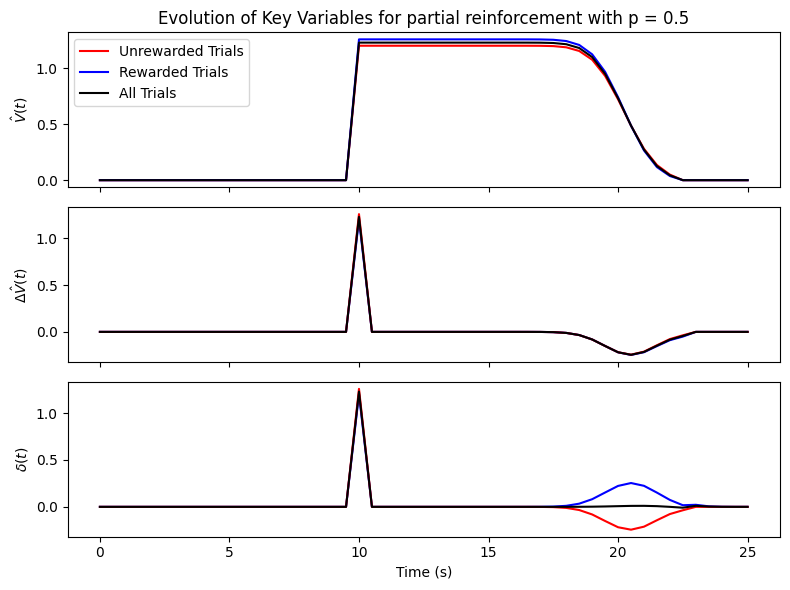

In [54]:
p_reward = 0.5  # Probability of receiving a reward

w = np.zeros(memory_span)
N = 1000

values = np.zeros((N, time_steps))  
errors = np.zeros((N, time_steps))
delta_v = np.zeros((N, time_steps))
rewarded_trials = []  
unrewarded_trials = []  

reward_vector = (np.random.rand(N) < p_reward)
print(reward_vector[-100:])
# TD Learning with Partial Reinforcement
for trial in range(N):
    S = np.zeros(memory_span)  # Memory representation
    reward_given = reward_vector[trial]
    for t in range(1,time_steps):
        reward = reward_function((t-1) * dt) if reward_given else 0  # Reward only if selected
        # TD Learning update
        value_t = np.dot(w, phi[t,:])
        value_prev = np.dot(w, phi[t-1,:])
        dv = gamma * value_t - value_prev
        td_error = reward + dv
        w += epsilon * td_error * phi[t-1,:]  # Weight update

        # Store results
        values[trial, t] = value_t
        delta_v[trial, t] = dv
        errors[trial, t] = td_error

last_100_idx = np.arange(N - 100, N)
rewarded_idx = [idx for idx in last_100_idx if reward_vector[idx]]
unrewarded_idx = [idx for idx in last_100_idx if not reward_vector[idx]]
print(last_100_idx)
print(rewarded_idx)
print(unrewarded_idx)
# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
ax[0].plot(np.arange(time_steps) * dt, np.mean(values[rewarded_idx, :], axis=0), label="Unrewarded Trials", color="red")
ax[0].plot(np.arange(time_steps) * dt, np.mean(values[unrewarded_idx, :], axis=0), label="Rewarded Trials", color="blue")
ax[0].plot(np.arange(time_steps) * dt, np.mean(values[last_100_idx, :], axis=0), label="All Trials", color="black")
ax[0].set_ylabel(r'$\hat{V}(t)$')  # Value function
ax[0].set_title('Evolution of Key Variables for partial reinforcement with p = 0.5')
ax[0].legend()

ax[1].plot(np.arange(time_steps) * dt, np.mean(delta_v[rewarded_idx, :], axis=0), color="blue")
ax[1].plot(np.arange(time_steps) * dt, np.mean(delta_v[unrewarded_idx, :], axis=0), color="red")
ax[1].plot(np.arange(time_steps) * dt, np.mean(delta_v[last_100_idx, :], axis=0), color="black")
ax[1].set_ylabel(r'$\Delta \hat{V}(t)$')  # Temporal difference of value

ax[2].plot(np.arange(time_steps) * dt, np.mean(errors[rewarded_idx, :], axis=0), color="blue")
ax[2].plot(np.arange(time_steps) * dt, np.mean(errors[unrewarded_idx, :], axis=0), color="red")
ax[2].plot(np.arange(time_steps) * dt, np.mean(errors[last_100_idx, :], axis=0), color="black")
ax[2].set_ylabel(r'$\delta(t)$')  # TD error
ax[2].set_xlabel("Time (s)") # Temporal difference learning error


plt.tight_layout()
plt.show()

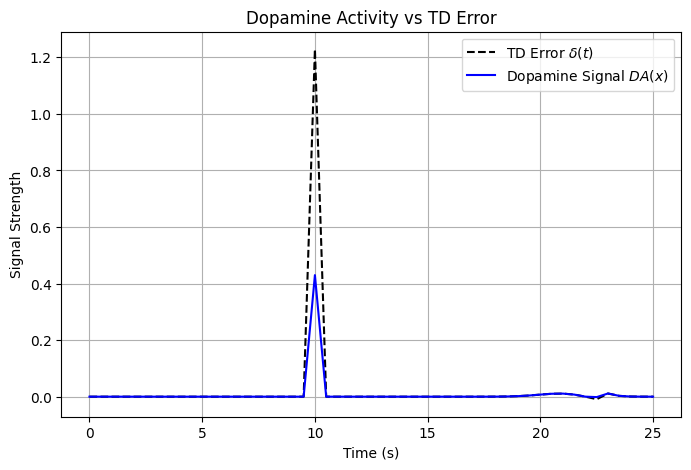

In [55]:
# Parameters for dopamine activity
alpha = 6
beta = 6
x_star = 0.27

# Dopamine activity function
def dopamine_activity(x):
    if x < 0:
        return x / alpha  # Limited negative range
    elif 0 <= x < x_star:
        return x  # Linear 
    else:
        return x_star + (x - x_star) / beta  # Saturation at high values

# Generate dopamine signal for the last 100 trials
last_100_td_errors = errors[-100:].mean(axis=0)  # Average TD error over last 100 trials
dopamine_values = np.array([dopamine_activity(x) for x in last_100_td_errors])

# Plot TD error vs dopamine signal
plt.figure(figsize=(8, 5))
plt.plot(np.arange(time_steps) * dt, last_100_td_errors, label=r'TD Error $\delta(t)$', color="black", linestyle="dashed")
plt.plot(np.arange(time_steps) * dt, dopamine_values, label=r'Dopamine Signal $DA(x)$', color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Signal Strength")
plt.title("Dopamine Activity vs TD Error")
plt.legend()
plt.grid(True)
plt.show()

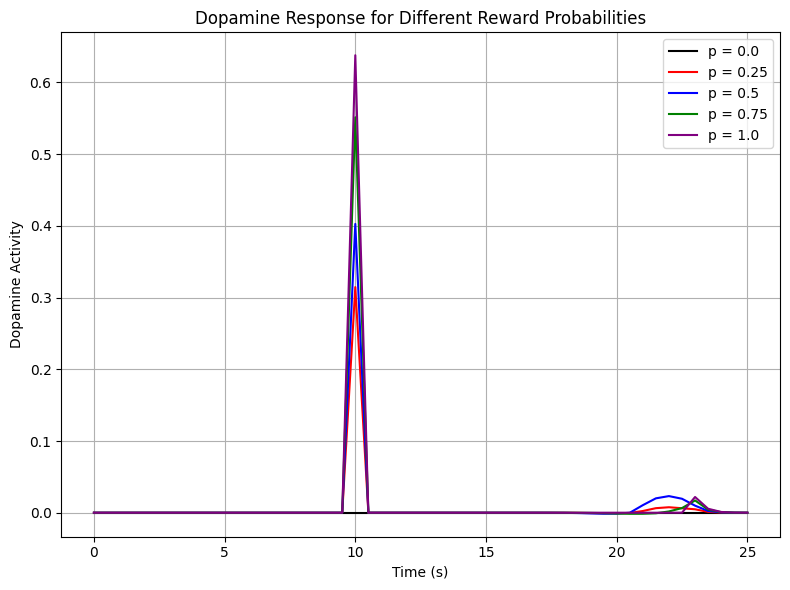

In [56]:
reward_probs = [0.0, 0.25, 0.5, 0.75, 1.0]  # Different reward probabilities

# Store dopamine responses for different reward probabilities
dopamine_responses = {}

# Run simulations for each reward probability
for p_reward in reward_probs:
    w = np.zeros(memory_span)  # Reset weights for each probability
    errors = np.zeros((N, time_steps))  # Store TD errors
    for trial in range(N):
        S = np.zeros(memory_span)  # Memory representation
        reward_given = np.random.rand() < p_reward  # Reward assigned based on p
        for t in range(1,time_steps):
            reward = reward_function((t-1) * dt) if reward_given else 0  # Apply reward probability
            # TD Learning update
            value_t = np.dot(w, phi[t,:])
            value_prev = np.dot(w, phi[t-1,:])
            td_error = reward + gamma * value_t - value_prev
            w += epsilon * td_error * phi[t-1,:]  # Weight update

            # Store TD error
            errors[trial, t] = td_error

    # Compute average TD error over last 100 trials
    last_100_td_errors = errors[-100:].mean(axis=0)

    # Convert TD error to dopamine response
    dopamine_values = np.array([dopamine_activity(x) for x in last_100_td_errors])

    # Store results in dictionary
    dopamine_responses[p_reward] = dopamine_values

# Plot dopamine responses for different reward probabilities
plt.figure(figsize=(8, 6))

colors = ['black', 'red', 'blue', 'green', 'purple']
for i, p in enumerate(reward_probs):
    plt.plot(np.arange(time_steps) * dt, dopamine_responses[p], label=f'p = {p}', color=colors[i])

# Labels and legend
plt.xlabel("Time (s)")
plt.ylabel("Dopamine Activity")
plt.title("Dopamine Response for Different Reward Probabilities")
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

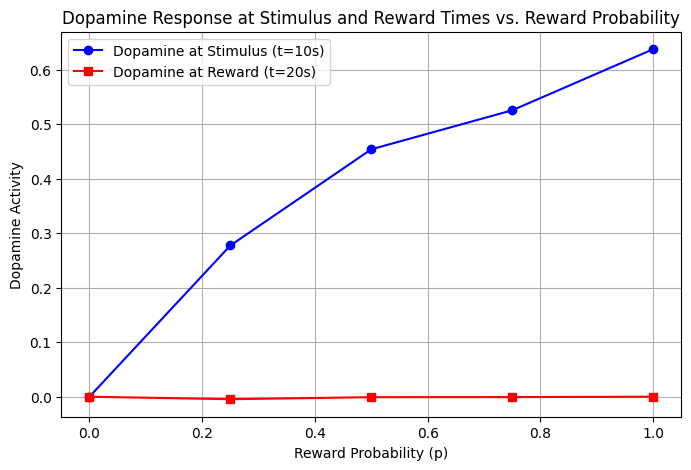

In [57]:
# Store peak dopamine responses at stimulus and reward times
dopamine_at_stimulus = []
dopamine_at_reward = []

# Run simulations for each reward probability
for p_reward in reward_probs:
    w = np.zeros(memory_span)  # Reset weights for each simulation
    errors = np.zeros((N, time_steps))  # Store TD errors
    for trial in range(N):
        S = np.zeros(memory_span)  # Memory representation
        reward_given = np.random.rand() < p_reward  # Reward assigned based on p
        for t in range(1, time_steps):
            reward = reward_function((t-1) * dt) if reward_given else 0  # Apply reward probability
            # TD Learning update
            value_t = np.dot(w, phi[t,:])
            value_prev = np.dot(w, phi[t-1,:])
            td_error = reward + gamma * value_t - value_prev
            w += epsilon * td_error * phi[t-1,:]  # Weight update
            # Store TD error
            errors[trial, t] = td_error

    # Compute average TD error over last 100 trials
    last_100_td_errors = errors[-100:].mean(axis=0)

    # Convert TD error to dopamine response
    dopamine_values = np.array([dopamine_activity(x) for x in last_100_td_errors])

    # Extract dopamine levels at stimulus time (t=10s) and reward time (t=20s)
    stim_window_mask = [19,20,21]
    peak_stim = np.max(dopamine_values[stim_window_mask])

    t_reward_idx = int(20 / dt)  # Index corresponding to 20s

    dopamine_at_stimulus.append(peak_stim)
    dopamine_at_reward.append(dopamine_values[t_reward_idx])

# Plot dopamine level at stimulus and reward times as a function of p
plt.figure(figsize=(8, 5))
plt.plot(reward_probs, dopamine_at_stimulus, marker='o', label="Dopamine at Stimulus (t=10s)", color="blue")
plt.plot(reward_probs, dopamine_at_reward, marker='s', label="Dopamine at Reward (t=20s)", color="red")
plt.xlabel("Reward Probability (p)")
plt.ylabel("Dopamine Activity")
plt.title("Dopamine Response at Stimulus and Reward Times vs. Reward Probability")
plt.legend()
plt.grid(True)
plt.show()